In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np

In [ ]:
wine = pd.read_csv('/content/Wine.csv')

In [ ]:
#Exploratory Data Analysis
sns.set()
wine.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530,3
103,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415,2
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035,1
23,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015,1
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,2


In [ ]:
wine.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [ ]:
wine.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [ ]:
wine.duplicated().sum()

0

In [ ]:
#Univariate analysis

wine.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [ ]:
#we can see that the mean has varied range. We would want to Standardize the data.

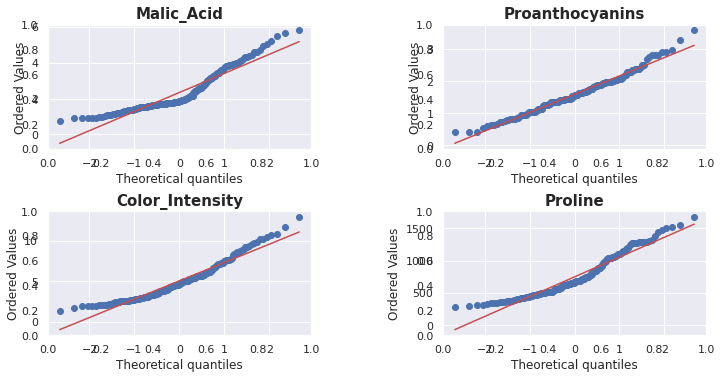

In [ ]:
import scipy.stats as stats
import pylab
wine_skewed = pd.DataFrame([wine['Malic_Acid'],wine['Proanthocyanins'],wine['Color_Intensity'],wine['Proline']]).T
#cols = [wine['Malic_Acid'],wine['Proanthocyanins'],wine['Color_Intensity'],wine['Proline']]
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(10,5))
fig.tight_layout()
axeslist = [221,222,223,224]
j=0
for col in wine_skewed.columns:
    ax = fig.add_subplot(axeslist[j])
    p=stats.probplot(wine_skewed[col], dist="norm", plot=ax)
    ax.set_title(col,fontweight="bold", size=15)
    fig.subplots_adjust(wspace=0.5)
    fig.subplots_adjust(hspace=0.5)
    j= j+1
# Malic_Acid and Proline are highly skewed   
#Proanthocyanins and Color_Intensity have light skew 

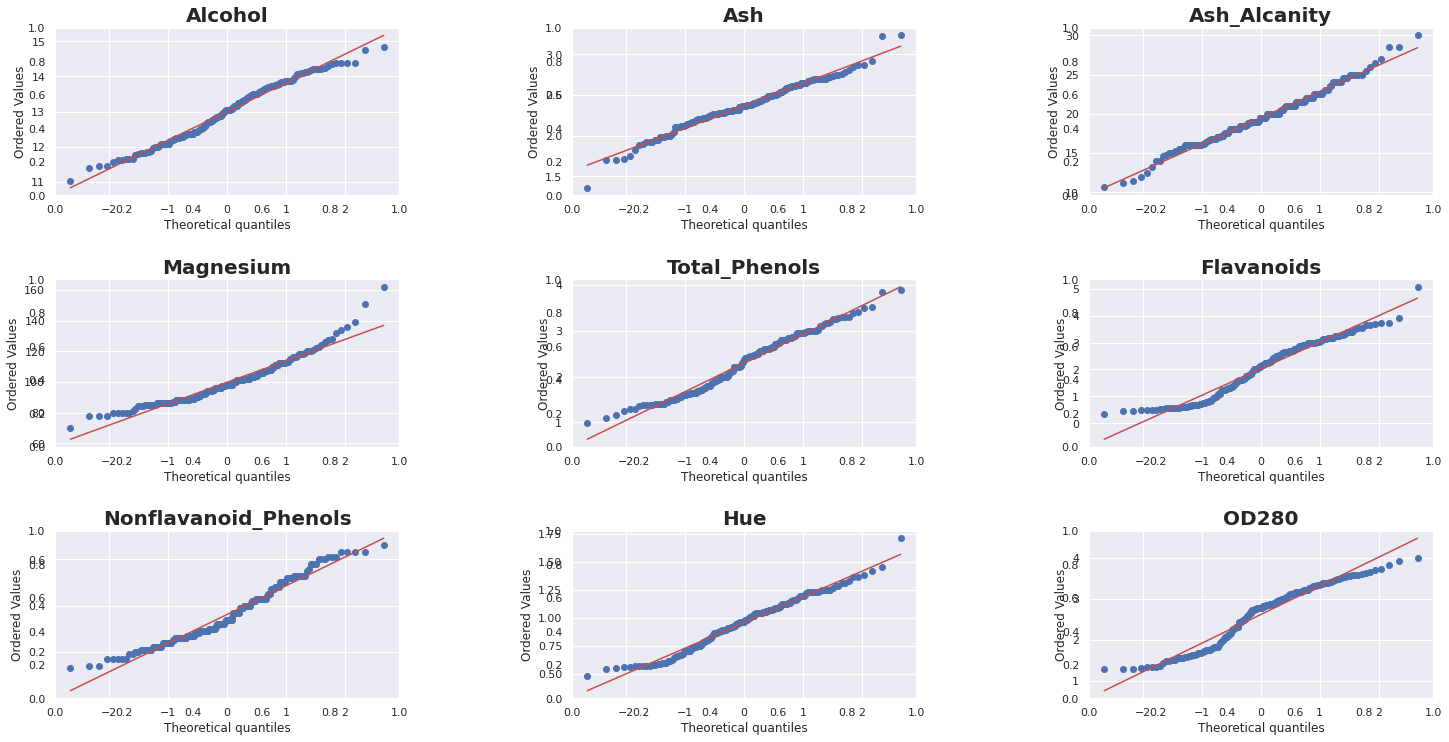

In [ ]:
#Review QQ Plot for other normally distributed columns
wine_noskew = pd.DataFrame([wine['Alcohol'],wine['Ash'],wine['Ash_Alcanity'],wine['Magnesium'],wine['Total_Phenols'],wine['Flavanoids'],wine['Nonflavanoid_Phenols'],wine['Hue'],wine['OD280']]).T
fig, axes = plt.subplots(3, 3, sharex=False, figsize=(20,10))
fig.tight_layout()
axeslist = [331,332,333,334,335,336,337,338,339]
j=0
for col in wine_noskew.columns:
    ax = fig.add_subplot(axeslist[j])
    p=stats.probplot(wine_noskew[col], dist="norm", plot=ax)
    ax.set_title(col,fontweight="bold", size=20)
    fig.subplots_adjust(wspace=0.5)
    fig.subplots_adjust(hspace=0.5)
    j= j+1
#Except for Ash_Alcanityall others are also not normally distributed

In [ ]:
from scipy.stats import shapiro
def shapiroWilkTest(df):
    # create an Empty DataFrame object
    scorecard = pd.DataFrame()
    alpha = 0.05
    clm= []
    stat1=[]
    p1=[]
    dist=[]
    j=0
    for c in df.columns:  
        stat, p = shapiro(wine.iloc[:,j])
        clm.append(c)
        stat1.append(stat)
        p1.append(p)
        if p > alpha:
            dist.append('Gaussian') 
        else:
            dist.append('Not Gaussian')
        j=j+1
    scorecard['column'] = clm
    scorecard['stat'] = stat1
    scorecard['p'] = p1
    scorecard['Distribution'] = dist
    return scorecard

In [ ]:
#Apply Shapiro-Wilk to test the null hypothesis that the data was drawn from a normal distribution.
shapiroWilkTest(wine)

,column,stat,p,Distribution
0,Alcohol,0.981805,2.005172e-02,Not Gaussian
1,Malic_Acid,0.888784,2.945930e-10,Not Gaussian
2,Ash,0.983947,3.868526e-02,Not Gaussian
3,Ash_Alcanity,0.990225,2.638694e-01,Gaussian
4,Magnesium,0.938331,6.345416e-07,Not Gaussian
5,Total_Phenols,0.976682,4.395752e-03,Not Gaussian
6,Flavanoids,0.954527,1.679064e-05,Not Gaussian
7,Nonflavanoid_Phenols,0.962522,1.055266e-04,Not Gaussian
8,Proanthocyanins,0.980723,1.445338e-02,Not Gaussian
9,Color_Intensity,0.940319,9.229477e-07,Not Gaussian


In [ ]:
#Outliers
from sklearn.preprocessing import MinMaxScaler
#Normalize data to view boxplot
scalerMM = MinMaxScaler()
wine_norm= pd.DataFrame(scalerMM.fit_transform(wine))
wine_norm.columns=wine.columns

In [ ]:
wine_norm.sample(4)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
73,0.515789,0.183794,0.663102,1.000000,0.750000,0.800000,0.537975,0.150943,0.488959,0.176621,0.674797,0.816850,0.504280,0.5
140,0.500000,0.409091,0.716578,0.536082,0.282609,0.193103,0.033755,0.754717,0.107256,0.283276,0.235772,0.380952,0.229672,1.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
35,0.644737,0.211462,0.561497,0.510309,0.326087,0.593103,0.556962,0.245283,0.457413,0.325939,0.455285,0.805861,0.457917,0.0


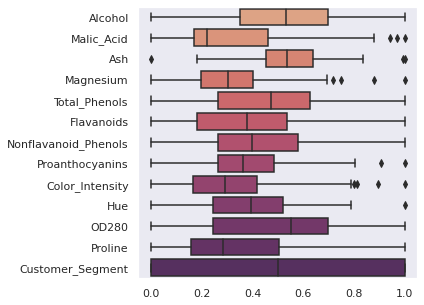

In [ ]:

#View outliers for non Gaussian distributions
plt.figure(figsize=(5,5))
sns.set_style("dark")
sns.boxplot(data=wine_norm.drop(['Ash_Alcanity'], axis=1), orient="h", palette = 'flare')

In [ ]:
#wine_norm_nooutlier = wine_norm[0:0]
wine_norm_nooutlier = wine_norm

In [ ]:
# Detection of outliers (find limits for salary based on IQR)
IQR = wine_norm['Malic_Acid'].quantile(0.75) - wine_norm['Malic_Acid'].quantile(0.25)
upper_limit = wine_norm['Malic_Acid'].quantile(0.75) + (IQR * 1.5)
wine_norm[wine_norm['Malic_Acid']>upper_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
123,0.531579,1.000000,0.411765,0.561856,0.173913,0.565517,0.487342,0.320755,0.504732,0.112628,0.203252,0.670330,0.072753,0.5
137,0.394737,0.942688,0.684492,0.742268,0.282609,0.279310,0.054852,0.943396,0.217666,0.317406,0.276423,0.153846,0.169044,1.0
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,1.0


In [ ]:
wine_norm_nooutlier['Malic_Acid'] = np.where(wine_norm['Malic_Acid']>upper_limit,upper_limit,wine_norm['Malic_Acid'])

In [ ]:
IQR = wine_norm['Ash'].quantile(0.75) - wine_norm['Ash'].quantile(0.25)
upper_limit = wine_norm['Ash'].quantile(0.75) + (IQR * 1.4)
lower_limit = wine_norm['Ash'].quantile(0.25) - (IQR * 1.5)
wine_norm[(wine_norm['Ash']<lower_limit)| (wine_norm['Ash']>upper_limit)]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
25,0.531579,0.258893,0.994652,0.742268,0.586957,0.568966,0.493671,0.641509,0.476341,0.196246,0.528455,0.706960,0.393723,0.0
59,0.352632,0.039526,0.000000,0.000000,0.195652,0.344828,0.048523,0.283019,0.003155,0.057167,0.463415,0.201465,0.172611,0.5
121,0.139474,0.258893,1.000000,0.922680,0.532609,0.758621,1.000000,0.641509,0.460568,0.402730,0.365854,0.886447,0.133381,0.5


In [ ]:
wine_norm_nooutlier['Ash'] = np.where(wine_norm['Ash']>upper_limit,upper_limit,np.where(wine_norm['Ash']<lower_limit,lower_limit,wine_norm['Ash']))

In [ ]:
IQR = wine_norm['Magnesium'].quantile(0.75) - wine_norm['Magnesium'].quantile(0.25)
upper_limit = wine_norm['Magnesium'].quantile(0.75) + (IQR * 1.5)
wine_norm[wine_norm['Magnesium']>upper_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
69,0.310526,0.088933,0.208556,0.319588,0.880435,0.300000,0.198312,0.018868,0.659306,0.133959,0.650407,0.659341,0.313837,0.5
73,0.515789,0.183794,0.663102,1.000000,0.750000,0.800000,0.537975,0.150943,0.488959,0.176621,0.674797,0.816850,0.504280,0.5
78,0.342105,0.049407,0.315508,0.216495,0.717391,0.317241,0.318565,0.415094,0.741325,0.180887,0.471545,0.380952,0.336662,0.5
95,0.378947,0.154150,0.449198,0.432990,1.000000,0.524138,0.407173,0.358491,0.905363,0.112628,0.552846,0.498168,0.470043,0.5


In [ ]:
wine_norm_nooutlier['Magnesium'] = np.where(wine_norm['Magnesium']>upper_limit,upper_limit,wine_norm['Magnesium'])

In [ ]:
IQR = wine_norm['Proanthocyanins'].quantile(0.75) - wine_norm['Proanthocyanins'].quantile(0.25)
upper_limit = wine_norm['Proanthocyanins'].quantile(0.75) + (IQR * 1.5)
wine_norm[wine_norm['Proanthocyanins']>upper_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
95,0.378947,0.154150,0.449198,0.432990,0.711957,0.524138,0.407173,0.358491,0.905363,0.112628,0.552846,0.498168,0.470043,0.5
110,0.113158,0.592885,0.245989,0.458763,0.402174,0.758621,0.472574,0.207547,1.000000,0.138225,0.219512,0.564103,0.202568,0.5


In [ ]:
wine_norm_nooutlier['Proanthocyanins'] = np.where(wine_norm['Proanthocyanins']>upper_limit,upper_limit,wine_norm['Proanthocyanins'])

In [ ]:
IQR = wine_norm['Color_Intensity'].quantile(0.75) - wine_norm['Color_Intensity'].quantile(0.25)
upper_limit = wine_norm['Color_Intensity'].quantile(0.75) + (IQR * 1.5)
wine_norm[wine_norm['Color_Intensity']>upper_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
151,0.463158,0.381423,0.598930,0.587629,0.456522,0.172414,0.215190,0.207547,0.268139,0.812287,0.000000,0.073260,0.144080,1.0
158,0.871053,0.185771,0.716578,0.742268,0.304348,0.627586,0.204641,0.754717,0.722397,1.000000,0.073171,0.252747,0.272468,1.0
159,0.644737,0.183794,0.684492,0.613402,0.206522,0.558621,0.160338,0.735849,0.593060,0.893345,0.073171,0.186813,0.243937,1.0
166,0.636842,0.584980,0.663102,0.639175,0.445652,0.248276,0.122363,0.566038,0.331230,0.802048,0.300813,0.106227,0.297432,1.0


In [ ]:
wine_norm_nooutlier['Color_Intensity'] = np.where(wine_norm['Color_Intensity']>upper_limit,upper_limit,wine_norm['Color_Intensity'])

In [ ]:
IQR = wine_norm['Hue'].quantile(0.75) - wine_norm['Hue'].quantile(0.25)
upper_limit = wine_norm['Hue'].quantile(0.75) + (IQR * 1.5)
wine_norm[wine_norm['Hue']>upper_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
115,0.0,0.152174,0.449198,0.561856,0.163043,0.510345,0.386076,0.735849,0.504732,0.052901,1.0,0.586081,0.092011,0.5


In [ ]:
wine_norm_nooutlier['Hue'] = np.where(wine_norm['Hue']>upper_limit,upper_limit,wine_norm['Hue'])

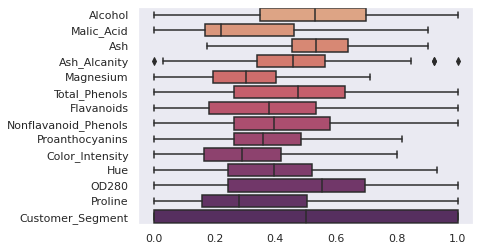

In [ ]:
sns.boxplot(data=wine_norm_nooutlier, orient="h", palette = 'flare')

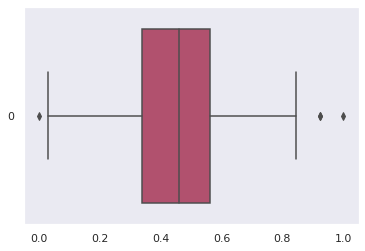

In [ ]:
#View outliers for Gaussian distributions
sns.set_style("dark")
sns.boxplot(data=wine_norm['Ash_Alcanity'], orient="h", palette = 'flare')

In [ ]:
lower_limit = wine_norm['Ash_Alcanity'].mean() - (3  * wine_norm['Ash_Alcanity'].std())
upper_limit = wine_norm['Ash_Alcanity'].mean() + (3  * wine_norm['Ash_Alcanity'].std())
wine_norm[(wine_norm['Ash_Alcanity']<lower_limit)| (wine_norm['Ash_Alcanity']>upper_limit)]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
73,0.515789,0.183794,0.663102,1.0,0.711957,0.8,0.537975,0.150943,0.488959,0.176621,0.674797,0.81685,0.50428,0.5


In [ ]:
wine_norm_nooutlier['Ash_Alcanity'] = np.where(wine_norm['Ash_Alcanity']>upper_limit,upper_limit,np.where(wine_norm['Ash_Alcanity']<lower_limit,lower_limit,wine_norm['Ash_Alcanity']))

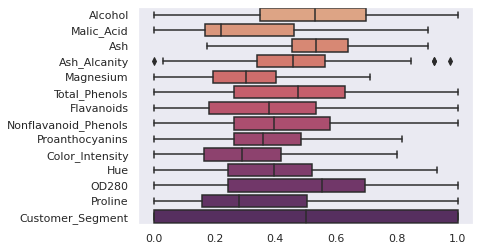

In [ ]:
#View boxplot post outlier treatment
sns.boxplot(data=wine_norm_nooutlier, orient="h", palette = 'flare')
#Outliers exist in 7 features 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Proanthocyanins', 'Color_Intensity' and 'Hue'

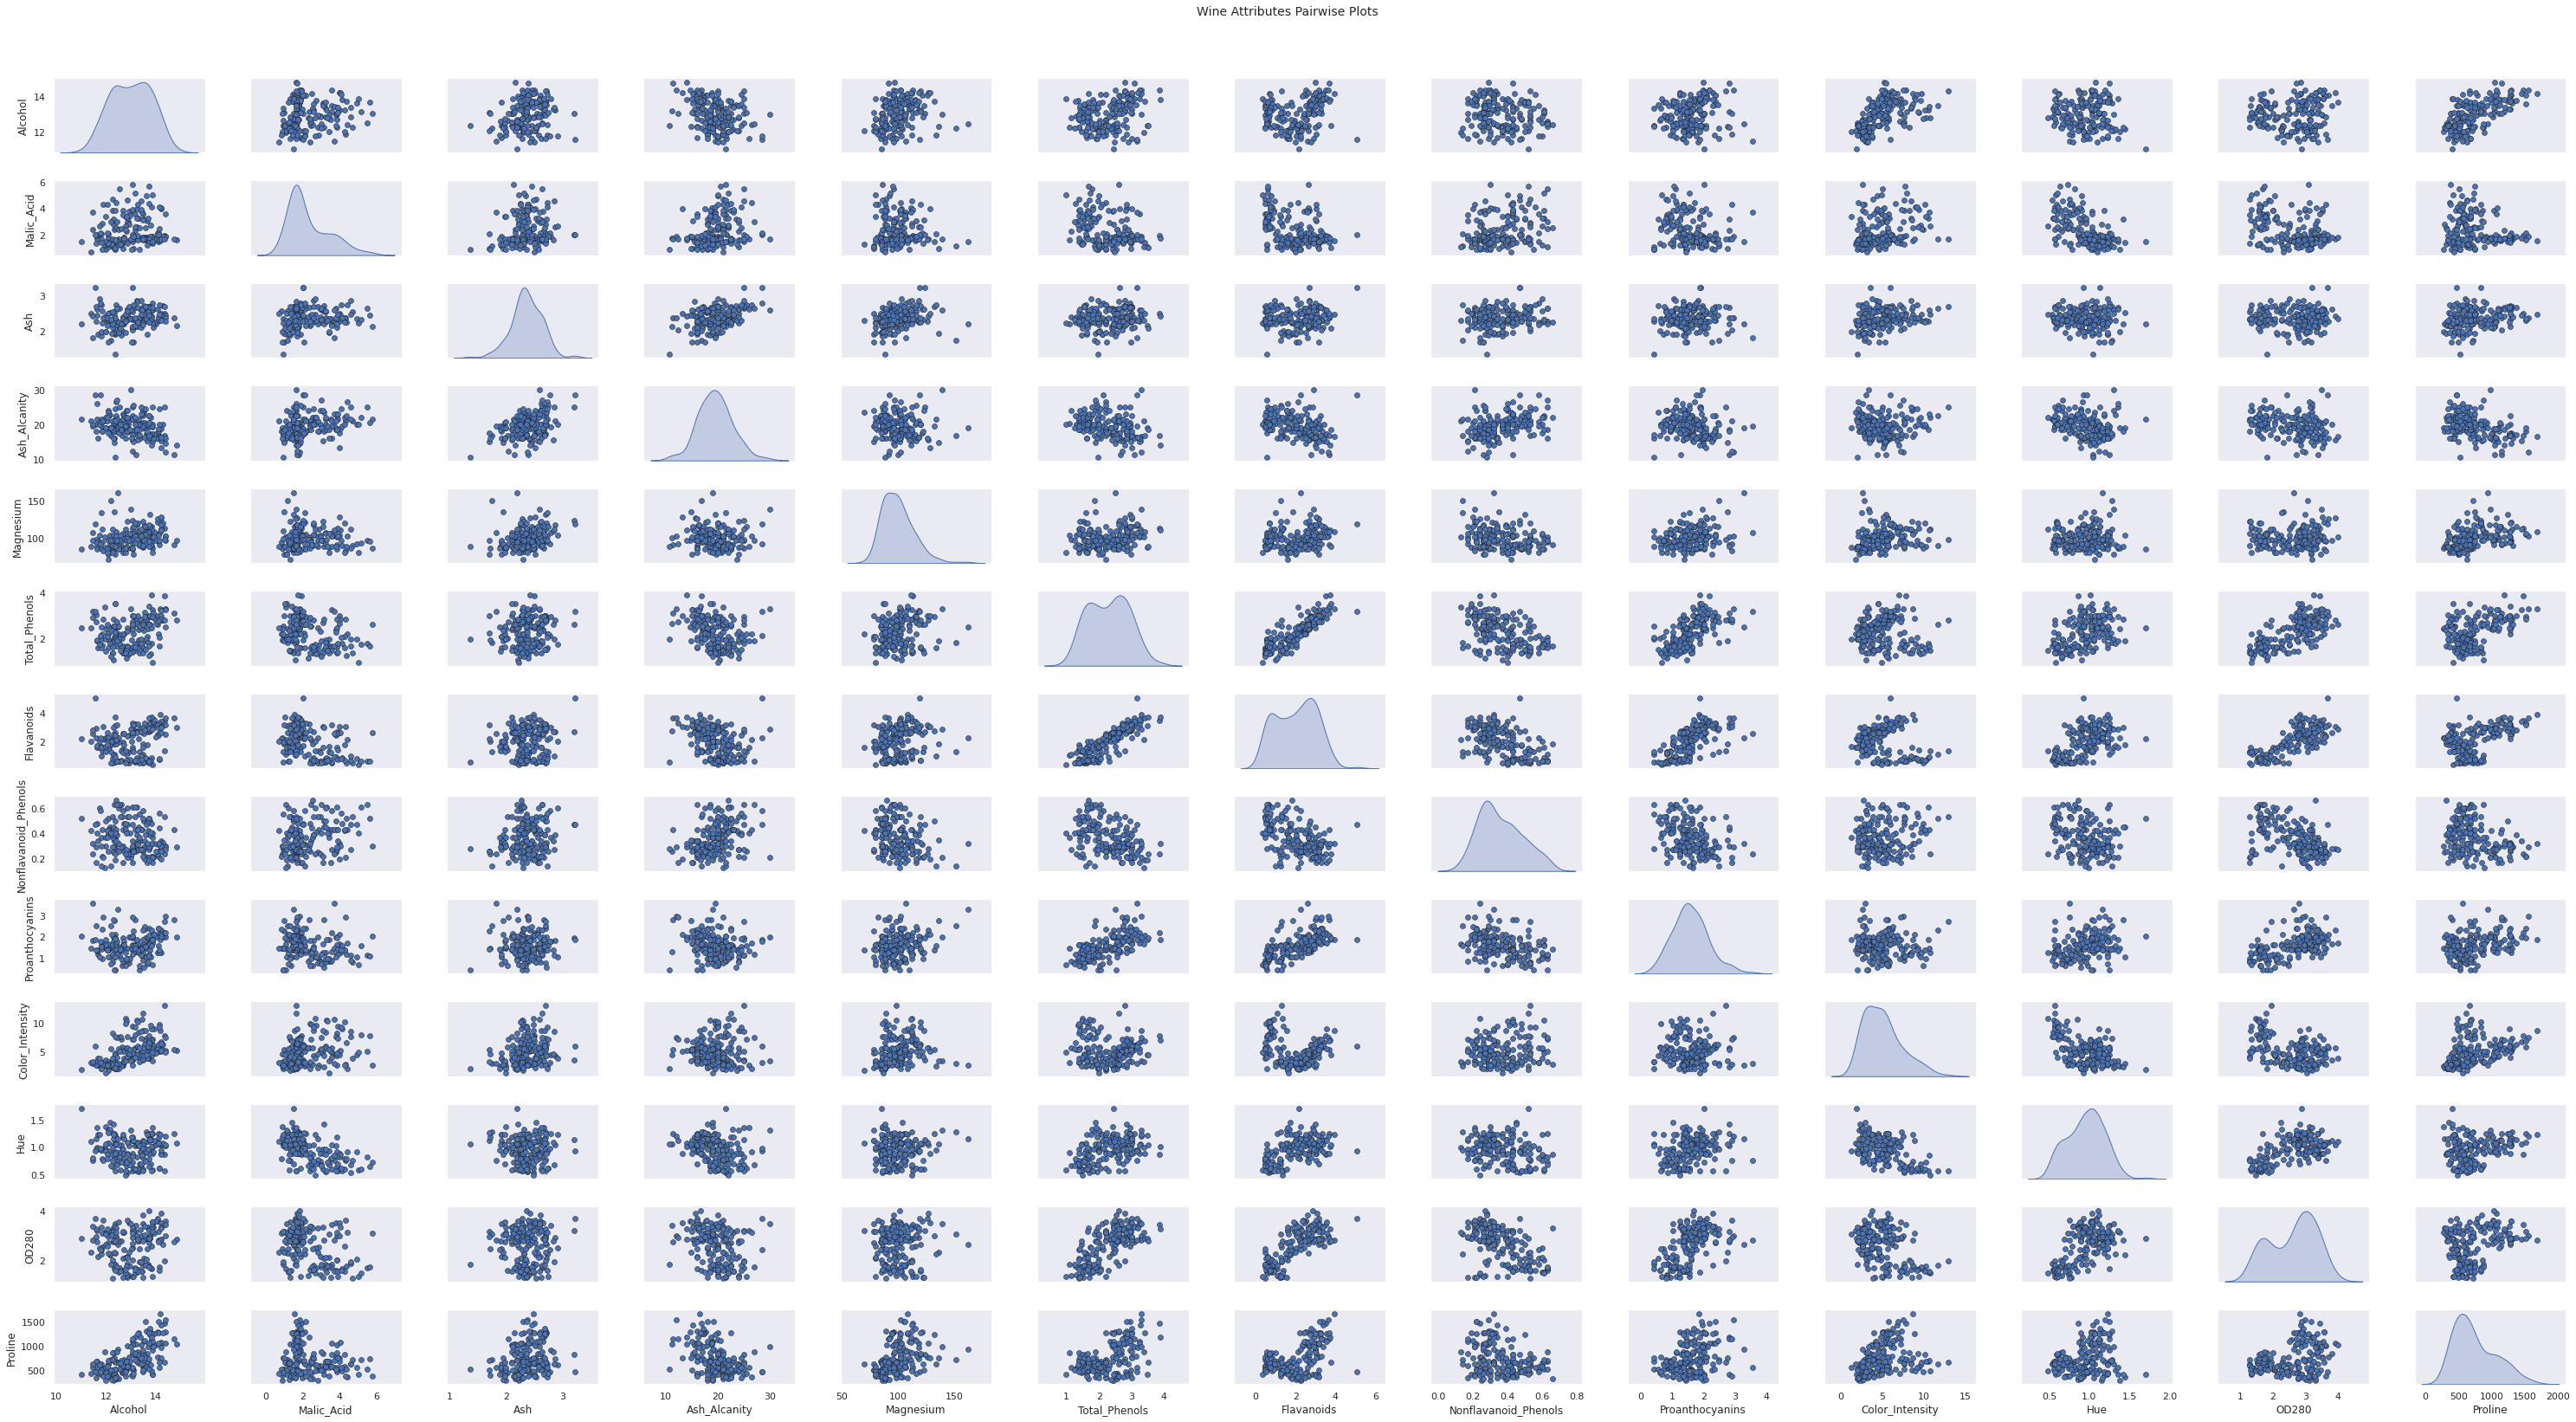

In [ ]:
#Multivariate Analysis
#Pair-wise Scatter Plots
cols = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
pp = sns.pairplot(wine[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

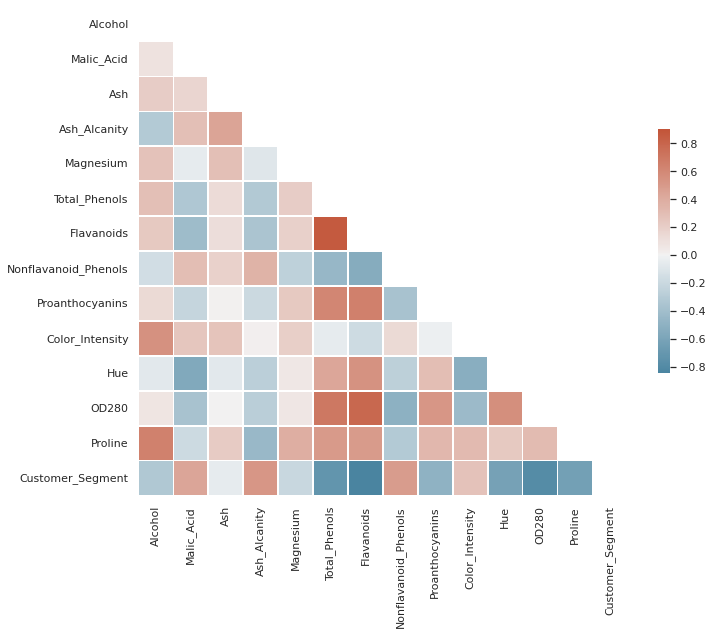

In [ ]:
#Triangular Heat Map
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(wine.corr(), dtype=bool))

corr= wine.corr(method ='pearson')

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#Correlation matrix
wine.corr(method ='pearson')

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [ ]:
#Get only highly correlated items
#We will replace outliers and store in dataframe wine_norm_nooutlier and use for K-Means which is sensitive to distance based outliers.
df = wine.corr().abs().round(1)
df = wine.corr().round(1)
for column in df:
    ac = df[column].round(1)
    replace_col = df[((ac < 0.5) & (ac >= 0))| ((ac > -0.5) & (ac <= 0))].index
    df.at[replace_col, column]='blah'
df
#We can see that Flavanoids and OD280 have high correlation with most other ingredients.

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.0,blah,blah,blah,blah,blah,blah,blah,blah,0.5,blah,blah,0.6,blah
Malic_Acid,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah,-0.6,blah,blah,blah
Ash,blah,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah
Ash_Alcanity,blah,blah,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah,blah,0.5
Magnesium,blah,blah,blah,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah,blah
Total_Phenols,blah,blah,blah,blah,blah,1.0,0.9,blah,0.6,blah,blah,0.7,0.5,-0.7
Flavanoids,blah,blah,blah,blah,blah,0.9,1.0,-0.5,0.7,blah,0.5,0.8,0.5,-0.8
Nonflavanoid_Phenols,blah,blah,blah,blah,blah,blah,-0.5,1.0,blah,blah,blah,-0.5,blah,0.5
Proanthocyanins,blah,blah,blah,blah,blah,0.6,0.7,blah,1.0,blah,blah,0.5,blah,-0.5
Color_Intensity,0.5,blah,blah,blah,blah,blah,blah,blah,blah,1.0,-0.5,blah,blah,blah


In [ ]:
# Scaling - Standardize the numerical variables 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

yeojohnson = ColumnTransformer([
    ('ptransform',PowerTransformer(method='yeo-johnson', standardize=False), slice(0,13))
])

scaling = ColumnTransformer([
    ('scale',StandardScaler(), slice(0,13))
])

In [ ]:
#Create Pipeline
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('yeojohnson',yeojohnson),
    ('scaling',scaling)
])

In [ ]:
# Apply the tranformation
wine_transformed = pipe.fit_transform(wine_norm_nooutlier) 
#verify shape remains same after tranformation
tuple(map(lambda i, j: i - j, wine.shape, wine_transformed.shape))

(0, 1)

In [ ]:
# View sample records after transformation
wine_transformed[0:2,:]

array([[ 1.52186248, -0.4571062 ,  0.21716566, -1.18295054,  1.78293713,
         0.81955072,  1.03238764, -0.6043161 ,  1.23962733,  0.45094198,
         0.36557907,  2.04916349,  1.0840084 ],
       [ 0.24413997, -0.3600012 , -0.87580777, -2.65671684,  0.17582568,
         0.59005029,  0.74199479, -0.80180008, -0.50800574, -0.13675258,
         0.40978717,  1.15193108,  1.05047556]])

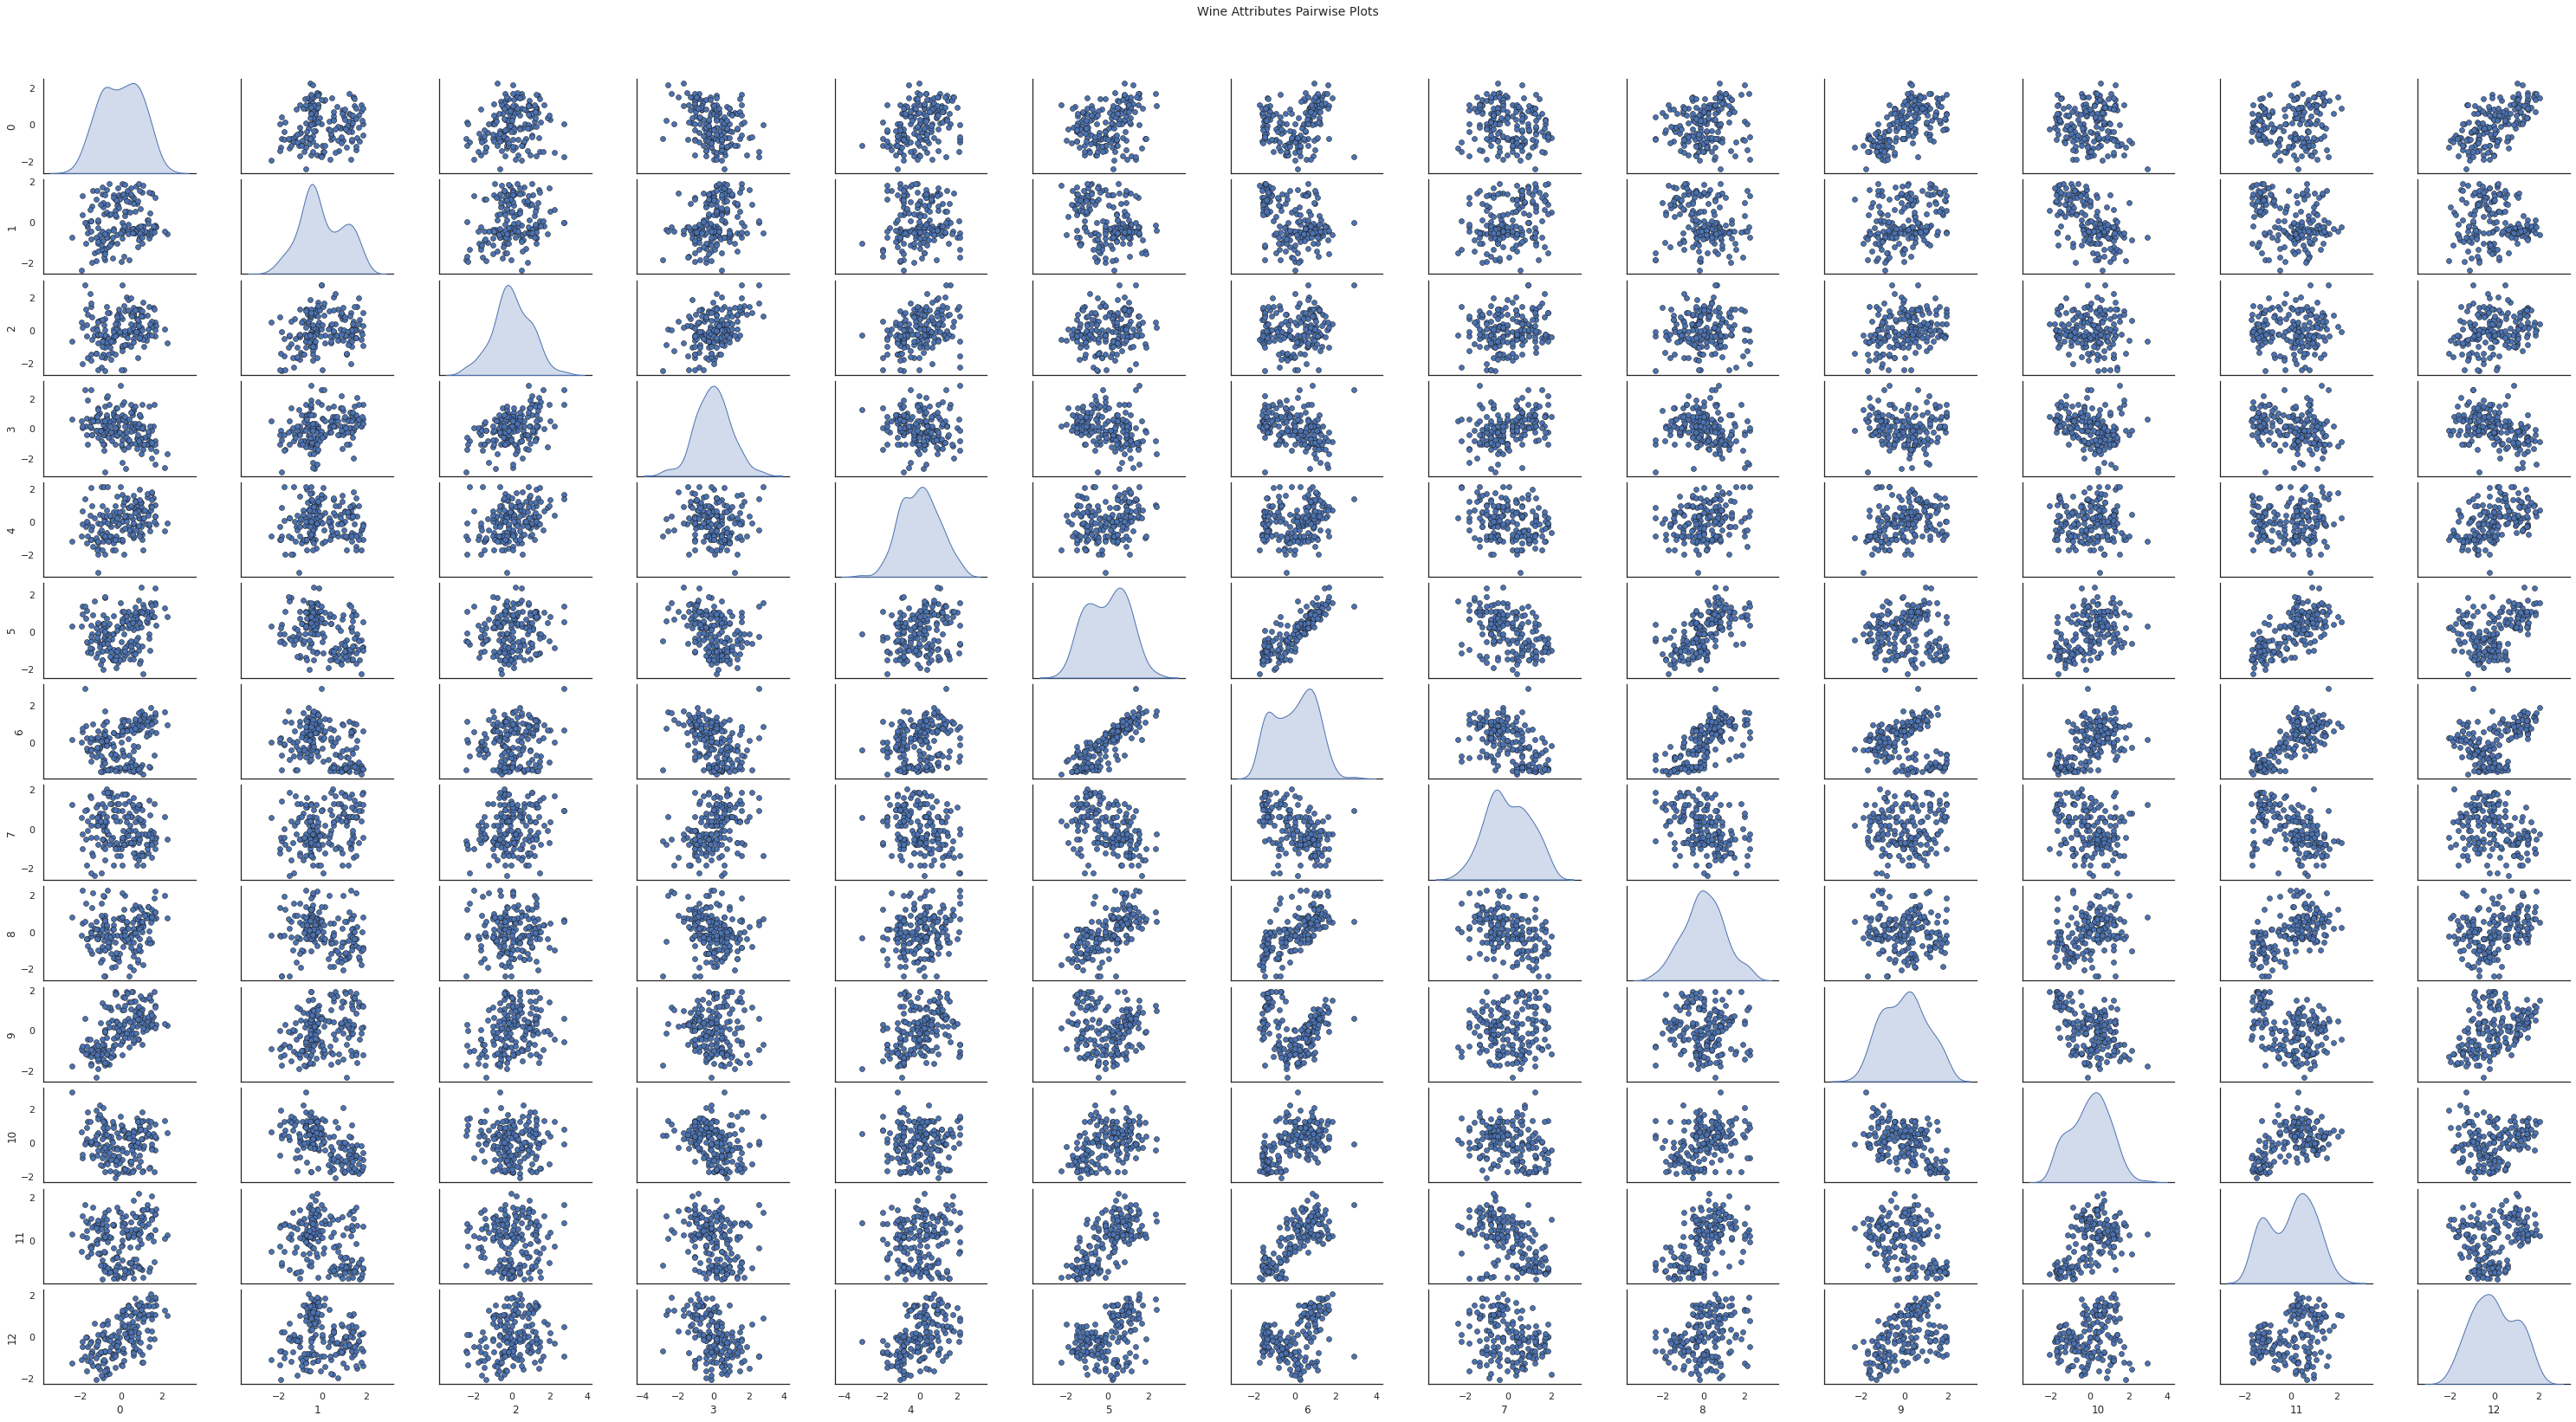

In [ ]:
# Pair-wise Scatter Plots
wt = pd.DataFrame(wine_transformed)
pp = sns.pairplot(wt, height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

In [ ]:
#Fit the model and Analyze
#Agglomerative Clustering
#View Dendrogram
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage

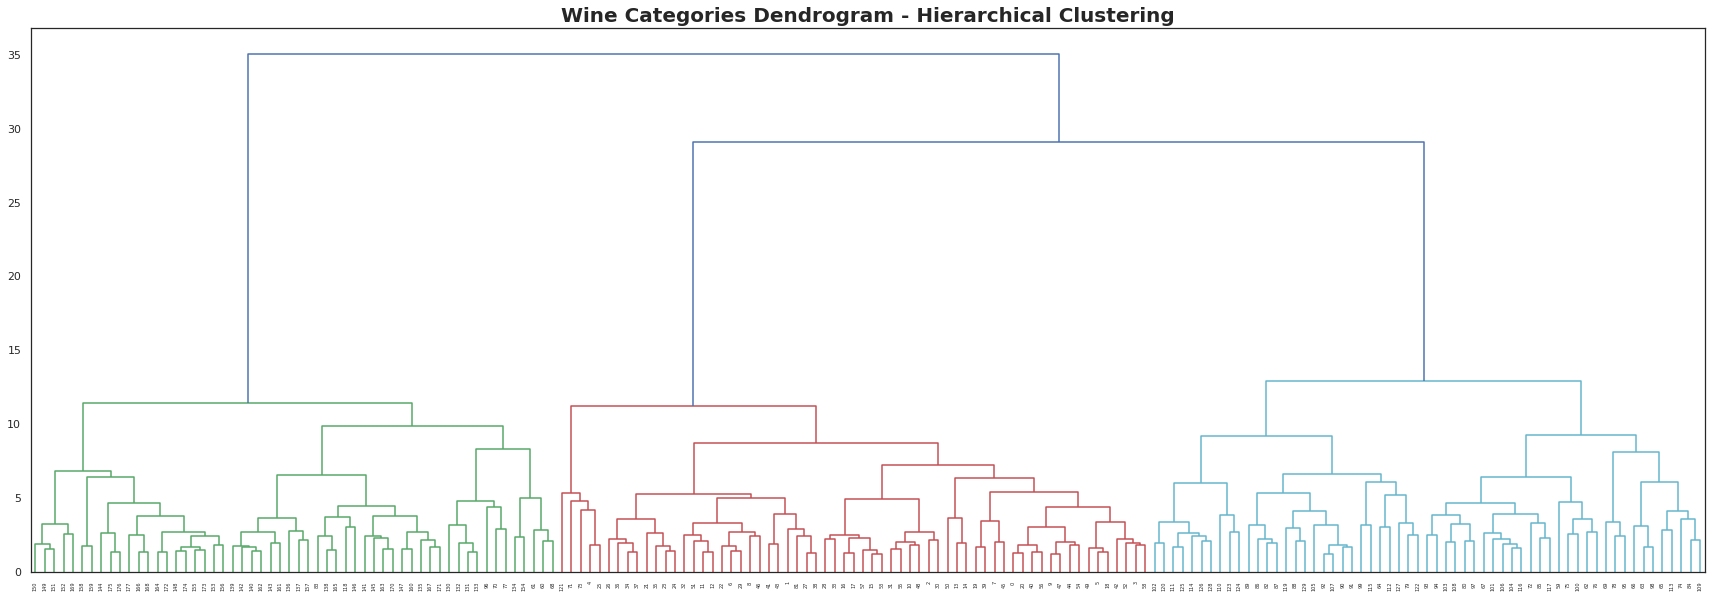

In [ ]:
Z = linkage(wine_transformed, method = "ward", metric = "euclidean")
plt.figure(figsize=(30, 10))
plt.title("Wine Categories Dendrogram - Hierarchical Clustering",fontsize=20,fontweight="bold")
dend = shc.dendrogram(Z)

In [ ]:
#Function to plot truncated dendrogram
# def plot_dendrogram(model, **kwargs):
  
#     count = np.zeros(model.children_.shape[0])
#     nsamples = len(model.labels_)
#     for i, merge in enumerate(model.children_):
#         currentcount = 0
#         for child_idx in merge:
#             if child_idx < nsamples:
#                 currentcount += 1  
#             else:
#                 currentcount += count[child_idx - nsamples]
#         count[i] = currentcount

#     linkagematrix = np.column_stack(
#         [model.children_, model.distances_, count]
#     ).astype(float)
#     dendrogram(linkagematrix, **kwargs)

In [ ]:
from sklearn.metrics import silhouette_score ,calinski_harabasz_score , davies_bouldin_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# Defining a function to find the optimal number of clusters' n_clusters parameter

def agglomerationScorecard(transformed_df):
    arr = np.empty((10, 10), dtype=object)
    # Number of clusters to search for and silhouette_scores list
    range_n_clusters = [2, 3, 4, 5]
    linkages = ['ward','average','complete','single']
    silhouette_scores = []
    #cal_har_scores =[]
    #dav_boulds =[]
    clusters=[]
    linkages1 = []
    #totals = []
    #cophenetics=[]
    # create an Empty DataFrame object
    scorecard = pd.DataFrame()
    for n_clusters in range_n_clusters:
         for link in linkages:                      
            cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage=link)
            labels_ = cluster.fit_predict(transformed_df)
            silhouette_avg = silhouette_score(transformed_df, labels_)
            # cal_har_score = calinski_harabasz_score(transformed_df, labels_)
            # dav_bould = davies_bouldin_score(transformed_df, labels_) 
            Z = linkage(transformed_df, method = link, metric = 'euclidean')
            # cophenetic, coph_dists = cophenet(Z, pdist(transformed_df))
            clusters.append(n_clusters)
            linkages1.append(link)
            silhouette_scores.append(silhouette_avg)
            # cal_har_scores.append(cal_har_score)
            # dav_boulds.append(dav_bould)
            # totals.append(silhouette_avg + cal_har_score + dav_bould )
            # cophenetics.append(cophenetic) 
    scorecard['clusters'] = clusters
    scorecard['linkage'] = linkages1
    scorecard['silhouette'] = silhouette_scores
    # scorecard['calinski_harabasz'] =cal_har_scores
    # scorecard['davies_bouldin']  = dav_boulds
    # scorecard['Total']  = totals
    # scorecard['cophenetic']  = cophenetics
    return scorecard

In [ ]:

s= agglomerationScorecard(wine_transformed)
#s = s.sort_values(['Total'], ascending=False ,ignore_index=True)
s

,clusters,linkage,silhouette
0,2,ward,0.262192
1,2,average,0.271903
2,2,complete,0.262608
3,2,single,0.271903
4,3,ward,0.293201
5,3,average,0.252560
6,3,complete,0.229210
7,3,single,0.172529
8,4,ward,0.251862
9,4,average,0.284821


In [ ]:
#Add to compare models table
compare_models = pd.DataFrame()
df2 = {'model': 'Agglomerative', 'silhouette': s['silhouette'][0]}
compare_models = compare_models.append(df2, ignore_index = True)

In [ ]:
compare_models

,model,silhouette
0,Agglomerative,0.262192


In [ ]:
cluster = AgglomerativeClustering(n_clusters=3 , affinity='euclidean',linkage='ward',compute_distances=True)
labels_=cluster.fit_predict(wine_transformed)

In [ ]:
# Data points spread
cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
# Data points count per label
# unique, counts = np.unique(labels_, return_counts=True)
# np.asarray((unique, counts)).T

array([[ 0, 59],
       [ 1, 56],
       [ 2, 63]])

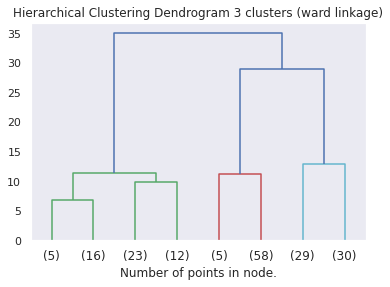

In [ ]:
from scipy.cluster.hierarchy import dendrogram
plt.title("Hierarchical Clustering Dendrogram 3 clusters (ward linkage)")
# plot the top two levels of the dendrogram
plot_dendrogram(cluster, truncate_mode="level", p=2)
plt.xlabel("Number of points in node.")
plt.show()

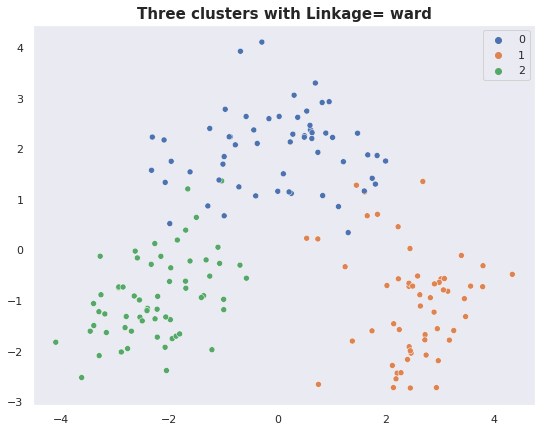

In [ ]:
from sklearn import decomposition
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
wine_pca = pca.fit_transform(wine_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=cluster.labels_, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("Three clusters with Linkage= ward",fontsize=15,fontweight="bold")
plt.show()

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2 , affinity='euclidean',linkage='ward',compute_distances=True)
labels_=cluster.fit_predict(wine_transformed)

In [ ]:
# Data points spread
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
# Data points count per label
# unique, counts = np.unique(labels_, return_counts=True)
# np.asarray((unique, counts)).T

array([[  0, 122],
       [  1,  56]])

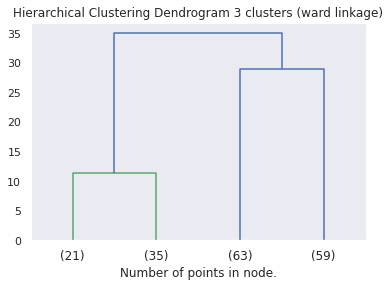

In [ ]:
plt.title("Hierarchical Clustering Dendrogram 3 clusters (ward linkage)")
# plot the top two levels of the dendrogram
plot_dendrogram(cluster, truncate_mode="level", p=1)
plt.xlabel("Number of points in node.")
plt.show()

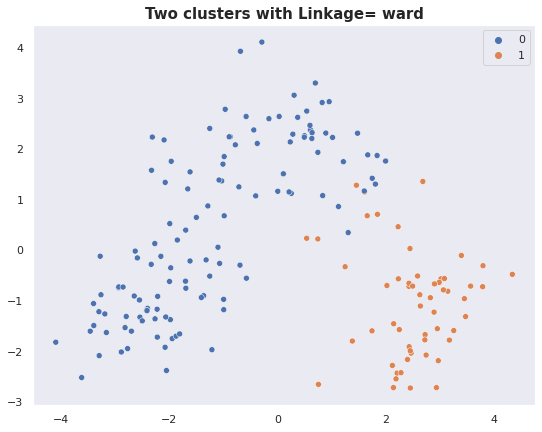

In [ ]:
from sklearn import decomposition
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=2)
wine_pca = pca.fit_transform(wine_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=cluster.labels_, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("Two clusters with Linkage= ward",fontsize=15,fontweight="bold")
plt.show()

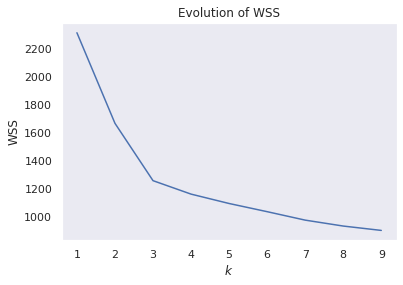

In [ ]:
#K Means Clustering
#Evaluate k with Elbow Graph
from sklearn.cluster import KMeans

inertia = []
k = range(1,10)
for iter in k:
    kmeans = KMeans(init = 'k-means++',n_clusters=iter, random_state=2)
    kmeans.fit(wine_transformed)
    y_kmeans = kmeans.predict(wine_transformed)
    centers = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_ ) # we already store this for later, inertia=WSS

plt.figure()
plt.title("Evolution of WSS")
plt.plot(k, inertia)
plt.ylabel("WSS")
plt.xlabel("$k$")
plt.xticks(k)
plt.show()

In [ ]:
kmeans = KMeans(init = 'k-means++' ,n_clusters=3, random_state=2)
kmeans.fit(wine_transformed)
y_kmeans = kmeans.predict(wine_transformed)

In [ ]:
# Data points spread
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [ ]:
# Data points count per label
# unique, counts = np.unique(y_kmeans, return_counts=True)
# np.asarray((unique, counts)).T


array([[ 0, 51],
       [ 1, 62],
       [ 2, 65]])

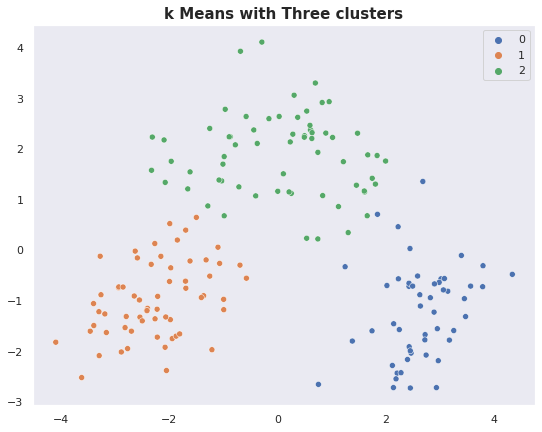

In [ ]:
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
wine_pca = pca.fit_transform(wine_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=y_kmeans, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("k Means with Three clusters",fontsize=15,fontweight="bold")
plt.show()

In [ ]:
# Calculate Silhouette Score for 3 clusters separated by k Means
s = silhouette_score(wine_transformed, y_kmeans)
 
print('silhouette_score = ', round(s,3))

silhouette_score =  0.299


In [ ]:
#Add to compare models table
df3 = {'model': 'kMeans', 'silhouette': s}
compare_models = compare_models.append(df3, ignore_index = True)
compare_models

,model,silhouette
0,Agglomerative,0.262192
1,kMeans,0.299467


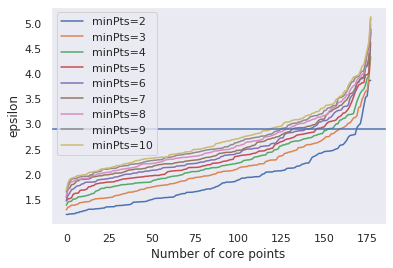

In [ ]:
#DBSCAN
from sklearn.neighbors import NearestNeighbors

# we use sklearn to find the nearest neighbors
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(wine_transformed)
distances, indices = nbrs.kneighbors(wine_transformed)
for k in range(1, 10):
    distances_k = np.sort(distances[:,k], axis=0)
    plt.plot(distances_k, label='minPts=%i' % (k+1))
sns.set_style('darkgrid')
plt.ylabel('epsilon')
plt.xlabel('Number of core points')
plt.axhline(2.9)
#plt.axhline(2.7)
plt.legend()
plt.show()
#The horizontal lines mark 𝑒𝑝𝑠𝑖𝑙𝑜𝑛=2.7 and 𝑒𝑝𝑠𝑖𝑙𝑜𝑛=3.4 , which look like good value for 𝑚𝑖𝑛𝑃𝑡𝑠=2 , respectively 𝑚𝑖𝑛𝑃𝑡𝑠=10 .

In [ ]:
#Apply DBSCAN clustering
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3 ,min_samples=2)
dbscan.fit(wine_transformed)
clusters = dbscan.labels_
len(set(clusters))

3

In [ ]:
 clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0, -1,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
# Data points count per label
# unique, counts = np.unique(clusters, return_counts=True)
# np.asarray((unique, counts)).T

array([[ -1,   7],
       [  0, 168],
       [  1,   3]])

In [ ]:
s = silhouette_score(wine_transformed,clusters)

s

0.09842783850258753

In [ ]:
#Add to compare models table
df5 = {'model': 'dbscan', 'silhouette': s}
compare_models = compare_models.append(df5, ignore_index = True)
compare_models

,model,silhouette
0,Agglomerative,0.262192
1,kMeans,0.299467
2,dbscan,0.098428


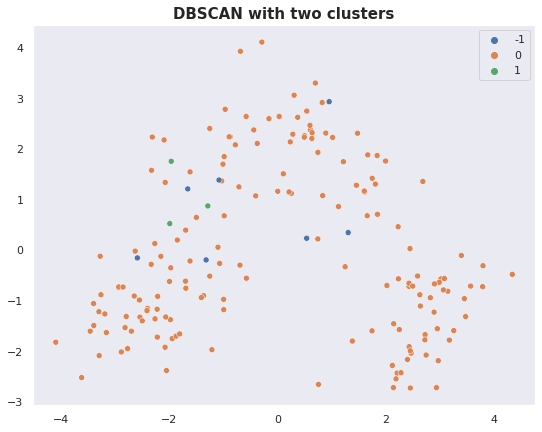

In [ ]:
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
wine_pca = pca.fit_transform(wine_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=dbscan.labels_, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("DBSCAN with two clusters",fontsize=15,fontweight="bold")
plt.show()

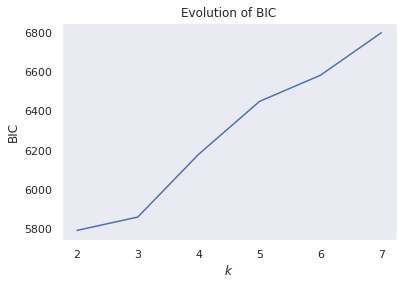

In [ ]:
#Evaluate k with BIC
#Determines a suitable number of clusters using the Bayesian Information Criterion (BIC).

from sklearn.mixture import GaussianMixture

ks=range(2,8)
bic = []
for k in ks:
    em = GaussianMixture(n_components=k,random_state=42)
    em.fit(wine_transformed)
    bic.append(em.bic(wine_transformed))

plt.figure()
plt.title("Evolution of BIC")
plt.plot(ks, bic)
plt.ylabel("BIC")
plt.xlabel("$k$")
plt.xticks(ks)
plt.show()

In [ ]:
#Apply Gaussian Mixture (Expectation-Maximization)
em = GaussianMixture(n_components=3,random_state=20)
em.fit(wine_transformed)
y_em = em.predict(wine_transformed)
y_em

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
# Data points count per label
# unique, counts = np.unique(y_em, return_counts=True)
# np.asarray((unique, counts)).T

array([[ 0, 66],
       [ 1, 51],
       [ 2, 61]])

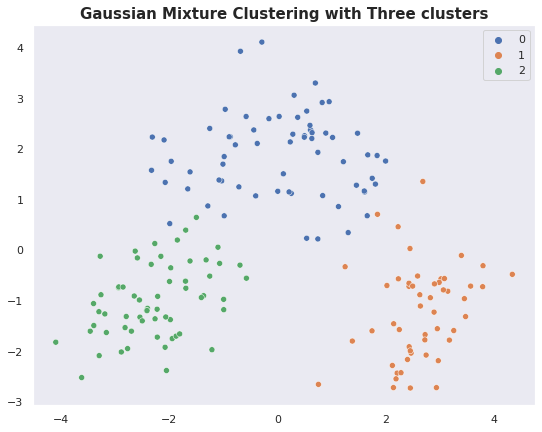

In [ ]:
#Visualize the Scatter Plot
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
wine_pca = pca.fit_transform(wine_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=y_em, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("Gaussian Mixture Clustering with Three clusters",fontsize=15,fontweight="bold")
plt.show()

In [ ]:
# Calculate Silhouette Score
s = silhouette_score(wine_transformed, y_em)

print('silhouette_score = ', round(s,3))

silhouette_score =  0.298


In [ ]:
#Add to compare models table
df5 = {'model': 'Gaussian Mixture', 'silhouette': s}
compare_models = compare_models.append(df5, ignore_index = True)
compare_models

,model,silhouette
0,Agglomerative,0.262192
1,kMeans,0.299467
2,dbscan,0.098428
3,Gaussian Mixture,0.298467


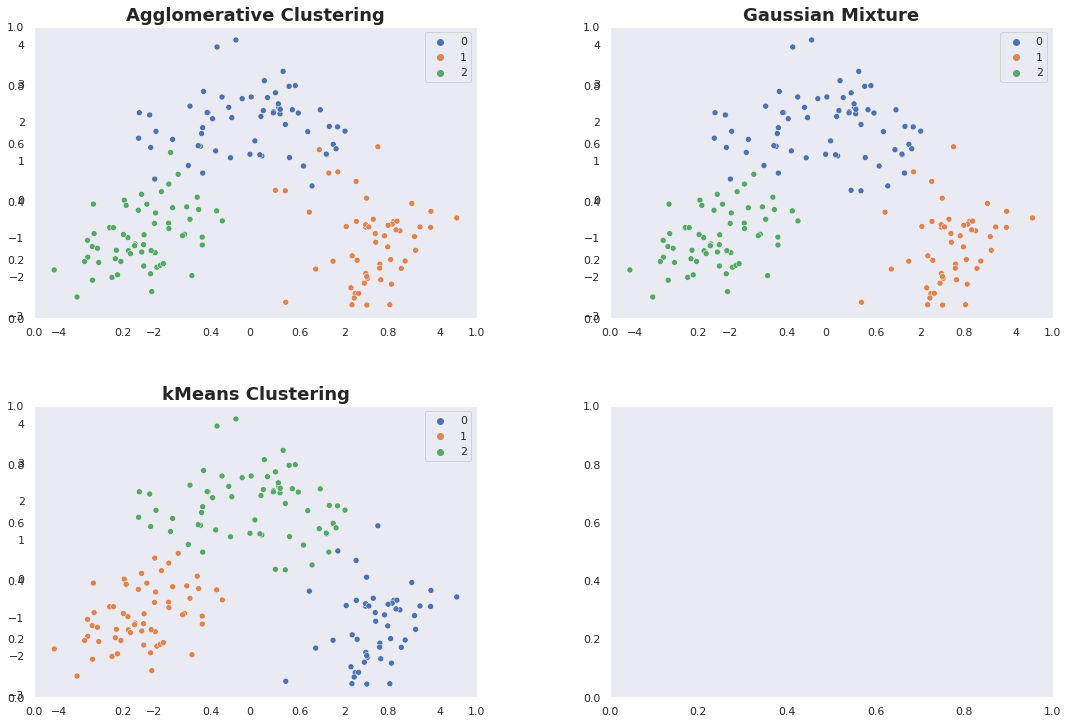

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(15,10))
fig.tight_layout()
axeslist = [221,222,223,224]

cluster = AgglomerativeClustering(n_clusters=3 , affinity='euclidean',linkage='ward',compute_distances=True)
labels_=cluster.fit_predict(wine_transformed)
ax = fig.add_subplot(axeslist[0])
sns.scatterplot(hue=cluster.labels_, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep",ax= ax)
ax.set_title('Agglomerative Clustering',fontweight="bold", size=18)

ax = fig.add_subplot(axeslist[1])
sns.scatterplot(hue=y_em, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep",ax= ax)
ax.set_title('Gaussian Mixture',fontweight="bold", size=18)

ax = fig.add_subplot(axeslist[2])
sns.scatterplot(hue=y_kmeans, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep",ax= ax)
ax.set_title('kMeans Clustering',fontweight="bold", size=18)


fig.subplots_adjust(wspace=0.3)
fig.subplots_adjust(hspace=0.3)